# 1. Librerias

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 2. Lectura de datos

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
"""Trabajaremos con un dataset de tres campos:

1.   Gender: sexo de la persona (Male, Female)
2.   Height: Estatura
3.   Weight: Peso


"""

#Leemos los datos
df = pd.read_csv("/content/drive/MyDrive/Data/weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


# 3. Gráfico Height vs Weight

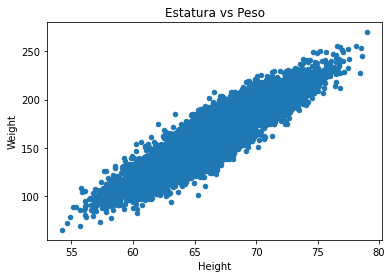

In [9]:
#Graficamos la estatura vs el peso
df.plot(
    kind = 'scatter',
    x = 'Height',
    y = 'Weight',
    title = 'Estatura vs Peso'
)

**¿Existe algún patrón en estos datos?**
"""
Notemos que tiene sentido decir que, en general, mientras más estatura tenga una persona, mayor será su peso, así que el peso de una persona depende de su estatura.

Encontremos una recta que represente bien esta relación. Vamos a dibujar una recta de manera manual
"""

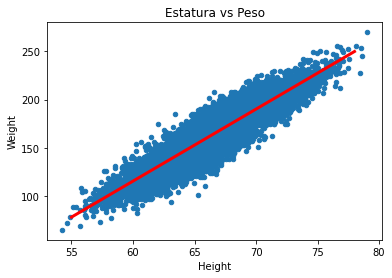

In [10]:
#Volvemos a graficar los puntos
df.plot(
    kind = 'scatter',
    x = 'Height',
    y = 'Weight',
    title = 'Estatura vs Peso'
)

#Dibujamos una recta
#Para dibujar la recta, indicaremos dos puntos, entre esos dos puntos se dibujará la recta
#Los puntos que colocaremos son:
# Punto 1: (55, 78)
# Punto 2: (75, 250)
plt.plot(
    [55, 78], #Array de componentes "X" de los puntos
    [78, 250], #Array de componentes "Y" de los puntos
    color = 'red',
    linewidth = 3
)

Visualmente podemos ver que está recta representa bien la realidad del patrón en los datos.

Pero, ¿qué tan bien representa la recta a los datos?

Para responder esto tenemos que definir una función que nos diga numéricamente qué tan bien la recta representa la realidad.

Utilizaremos la más básica, la función de costo cuadrático.

# 4. Ecuación de la recta

Vamos a definir una función para la ecuación de nuestra recta

In [11]:
#Ya sabemos que la recta tiene la forma:
# Y = b + wX

def recta(x, w, b):
  y = b + w*x
  return y

In [12]:
#Probamos algunos valores
y = recta(1, 7, 3)
y

y = recta(9, 11, -2)
y

97

# 5. Graficando la recta con su ecuación

In [13]:
#Vamos a tomar los valores X del dataframe
x = df['Height'].values
x

array([73.84701702, 68.78190405, 74.11010539, ..., 63.86799221,
       69.03424313, 61.94424588])

In [14]:
#Con estos elementos X, vamos a evaluar una recta hipótesis
#A esta recta hipótesis le daremos un valor de w=1.5 y b=0

#Definimos los parámetros de la recta
w = 1.5
b = 0

In [15]:
#Evaluamos la función para obtener los Y hipótesis
y_hipotesis = recta(x, w, b)
y_hipotesis

array([110.77052553, 103.17285607, 111.16515809, ...,  95.80198832,
       103.5513647 ,  92.91636882])

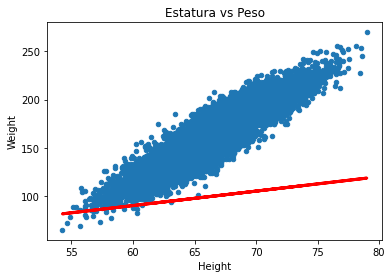

In [16]:
#Graficamos la nube de puntos y la recta hipótesis
df.plot(
    kind = 'scatter',
    x = 'Height',
    y = 'Weight',
    title = 'Estatura vs Peso'
)

#Graficamos la recta hipótesis
plt.plot(x, y_hipotesis, color = 'red', linewidth = '3')

Obviamente esta recta no representa bien el patrón de la realidad
¿Qué tan mal está representando el patrón de la realidad por esta recta?

In [18]:
##Para averiguarlo hay que calcular la función de costo de error cuadrático (mse: mean squared error)

# Función de error cuadrático

#Definicion de la funcion de costo de error cuadrático
def mean_squared_error(y_real, y_hipotesis):
  #Restamos uno a uno cada elemento del array y lo elevamos al cuadrado
  #Obtenemos un array "error" con la diferencia de cada elemento
  error = (y_real - y_hipotesis)**2

  #Sumamos todos los elementos restados y lo dividmos entre el número de elementos (hacemos un promedio)
  error_promedio = error.mean()

  return error_promedio

# Cálculo del error de la recta

In [19]:
#Obtenemos los "y_real"
y_real = df['Weight'].values
y_real

#Obtenemos los "y_hipostesis"
y_hipotesis

#Aplicamos la función para calcular el error de la recta
error = mean_squared_error(y_real, y_hipotesis)
error

4551.709996422391

In [20]:
#Vamos a tomar los valores X del dataframe
x = df['Height'].values
x

#Con estos elementos X, vamos a evaluar una recta hipótesis
#A esta recta hipótesis le daremos un valor de w=1.9 y b=0

#Definimos los parámetros de la recta
w = 1.9
b = 0

In [21]:
#Evaluamos la función para obtener los Y hipótesis
y_hipotesis = recta(x, w, b)
y_hipotesis

#Obtenemos los "y_real"
y_real = df['Weight'].values
y_real

#Aplicamos la función para calcular el error de la recta
error = mean_squared_error(y_real, y_hipotesis)
error

1899.2617604632856

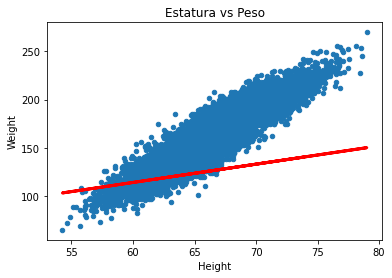

In [22]:
#Graficamos la nube de puntos y la recta hipótesis
df.plot(
    kind = 'scatter',
    x = 'Height',
    y = 'Weight',
    title = 'Estatura vs Peso'
)

#Graficamos la recta hipótesis
plt.plot(x, y_hipotesis, color = 'red', linewidth = '3')